## Phyllotaxy 🌻🌀

To learn about, model, and recreate parastichies ("adjacent" + "row" or "rank") let us first recreate the phyllotactic pattern. Spiral phyllotaxy is created by separating each successive node by the golden angle, and the distance of each node from the center is defined simply as $\sqrt{n}$. Let us define a function below that takes the number of desired points and whether the phyllotactic spiral has a positive or negative angular value and returns the `x` and `y` coordinate values of the points. The code for creating the spiral phyllotactic points is copied from the Plants&Python🌱🐍 lesson on modeling sunflower growth:

How to Build a Sunflower: https://danchitwood.github.io/plants_and_python/3_activity/  
Cómo construir un girasol: https://danchitwood.github.io/plants_and_python/ES_3_activity/

In [9]:
# Import necessary modules
import math  
import matplotlib.pyplot as plt
import numpy as np 

In [10]:
def phyllotaxy_pts(n, direction="positive"):

    """
    For n points, recreate the phyllotactic pattern. 
    "direction" indicates the handedness of the spiral, 
    and it is either "positive" or "negative"
    """
                   
    # Define the golden angle (in degrees)
    # From the online encyclopedia of integer sequences: 
    # https://oeis.org/A096627
    golden_angle = 137.5077640500378546463487396283702776206886952699253696312384958261062333851951
    
    # convert to radians
    phi = golden_angle * ( math.pi / 180.0 ) 

    # determine direction
    if direction=="negative":
        phi=-phi
    else:
        phi=phi
    
    # create lists to store the x and y coordinate values
    xlist = []
    ylist = []
        
    # for each point . . . 
    for n in range (0, n): 

        r = math.sqrt(n) # calculate radius
        theta = n * phi # calculate angle

        # calculate x and y coordinate values
        x = r * math.cos(theta)
        y = r * math.sin(theta)

        # append to list
        xlist.append(x)
        ylist.append(y)

    # create a numpy array
    points = np.column_stack((xlist, ylist))

    # return values
    return points


## Parastichies: every `nth` node of the Fibonacci sequence

One way to define parastichies is to take every `nth` node of the phyllotactic spiral, where `n` is a member of the Fibonacci sequence:   

$1, 1, 2, 3, 5, 8, 13, 21, 34 . . . $  

Using the `phyllotaxy_pts` function above, let's plot out some parastichies by taking every `nth` element of `3`, `5`, and `8`.

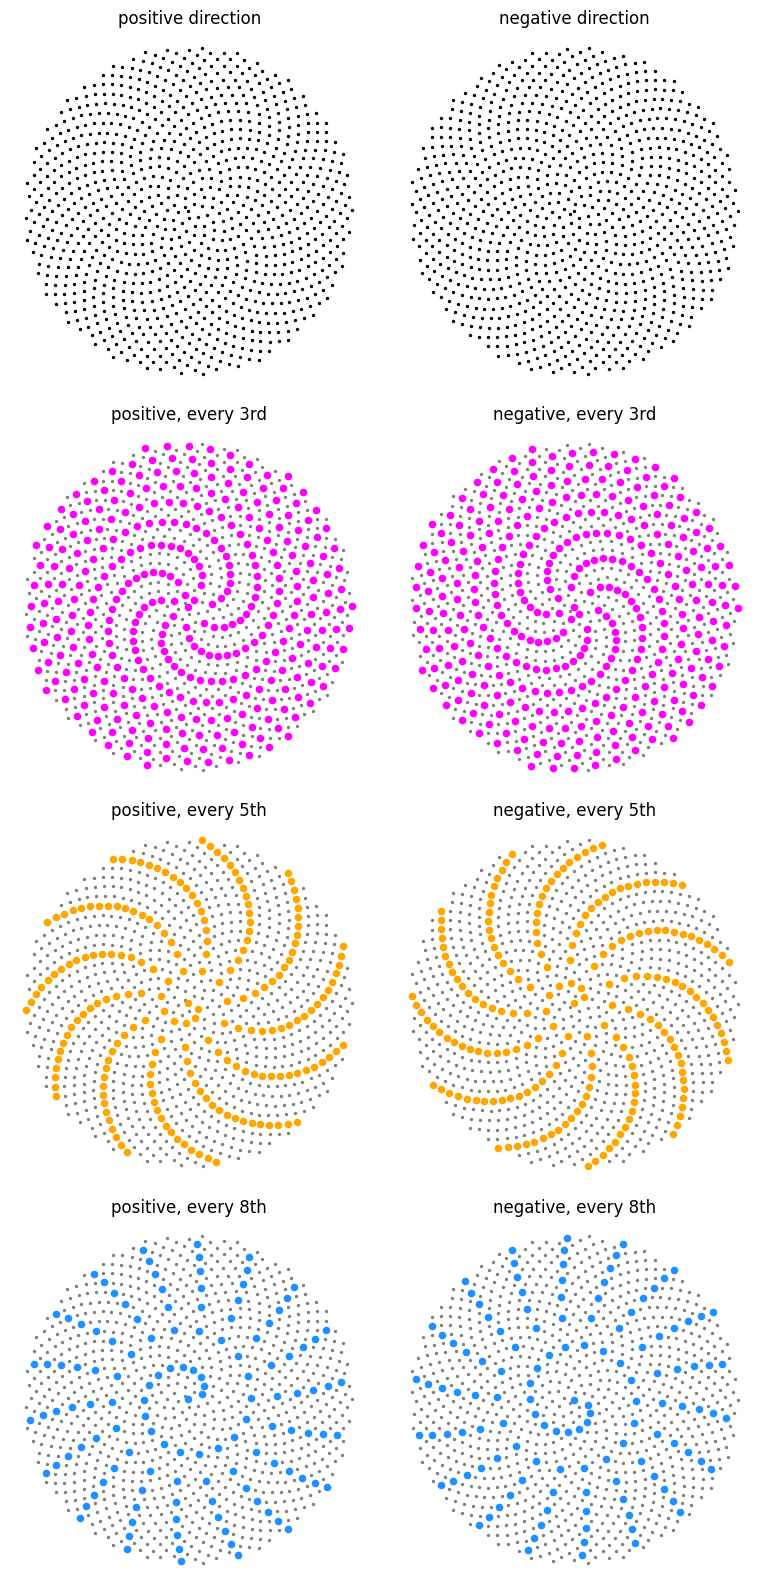

In [11]:
# select the total number of points
n = 1000

# use the funciton to calculate the points
positive_points = phyllotaxy_pts(n, direction="positive")
negative_points = phyllotaxy_pts(n, direction="negative")

# generate plot with parastichies
plt.figure(figsize=(8,16))

#####
# no parastichies
#####
plt.subplot(4,2,1)
plt.scatter(positive_points[:,0], positive_points[:,1], s=2, c="k")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title("positive direction")

plt.subplot(4,2,2)
plt.scatter(negative_points[:,0], negative_points[:,1], s=2, c="k")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title("negative direction")

#####
# every 3rd node
#####
plt.subplot(4,2,3)
plt.scatter(positive_points[:,0], positive_points[:,1], s=2, c="gray")
plt.scatter(positive_points[:,0][::3], positive_points[:,1][::3], s=20, c="magenta")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title("positive, every 3rd")

plt.subplot(4,2,4)
plt.scatter(negative_points[:,0], negative_points[:,1], s=2, c="gray")
plt.scatter(negative_points[:,0][::3], negative_points[:,1][::3], s=20, c="magenta")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title("negative, every 3rd")

#####
# every 5th node
#####
plt.subplot(4,2,5)
plt.scatter(positive_points[:,0], positive_points[:,1], s=2, c="gray")
plt.scatter(positive_points[:,0][::5], positive_points[:,1][::5], s=20, c="orange")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title("positive, every 5th")

plt.subplot(4,2,6)
plt.scatter(negative_points[:,0], negative_points[:,1], s=2, c="gray")
plt.scatter(negative_points[:,0][::5], negative_points[:,1][::5], s=20, c="orange")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title("negative, every 5th")

#####
# every 8th node
#####
plt.subplot(4,2,7)
plt.scatter(positive_points[:,0], positive_points[:,1], s=2, c="gray")
plt.scatter(positive_points[:,0][::8], positive_points[:,1][::8], s=20, c="dodgerblue")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title("positive, every 8th")

plt.subplot(4,2,8)
plt.scatter(negative_points[:,0], negative_points[:,1], s=2, c="gray")
plt.scatter(negative_points[:,0][::8], negative_points[:,1][::8], s=20, c="dodgerblue")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title("negative, every 8th")


plt.tight_layout()

## Parastichies: nearest neighbors

Another way to reveal parastichies is by finding the nearest neighbor for every point. For a set of points calculate from the `phyllotaxy_pts` function, the function below will find the nearest neighbors and return a list of the `x` and `y` coordinate values, where line segments are separated by `NaN` values.

In [12]:
def nearest_neighbors(points):
    
    # get length of points
    n_points = len(points)

    # Lists to store the coordinates for plotting the line segments.
    # The structure will be [x1, x1_nn, NaN, x2, x2_nn, NaN, ...]
    # The NaN is used by plt.plot to break the line segment.
    line_x = []
    line_y = []

    # 2. Iterate through each point to find its nearest neighbor
    for i in range(n_points):
        # Calculate the squared Euclidean distances from point 'i' to ALL other points.
        distances_sq = np.sum((points[i] - points)**2, axis=1)
    
        # Exclude the distance from the point to itself by setting it to a large value
        distances_sq[i] = np.inf
    
        # Find the index of the point with the minimum distance
        nearest_neighbor_index = np.argmin(distances_sq)
    
        # Get the coordinates of the current point and its nearest neighbor
        x_i, y_i = points[i]
        x_nn, y_nn = points[nearest_neighbor_index]
    
        # Append coordinates for the line segment and a NaN to break the line for plotting
        line_x.extend([x_i, x_nn, np.nan])
        line_y.extend([y_i, y_nn, np.nan])

    return line_x, line_y


(-34.240980675327435, 34.54297213836181, -34.40183494344153, 34.449612822885)

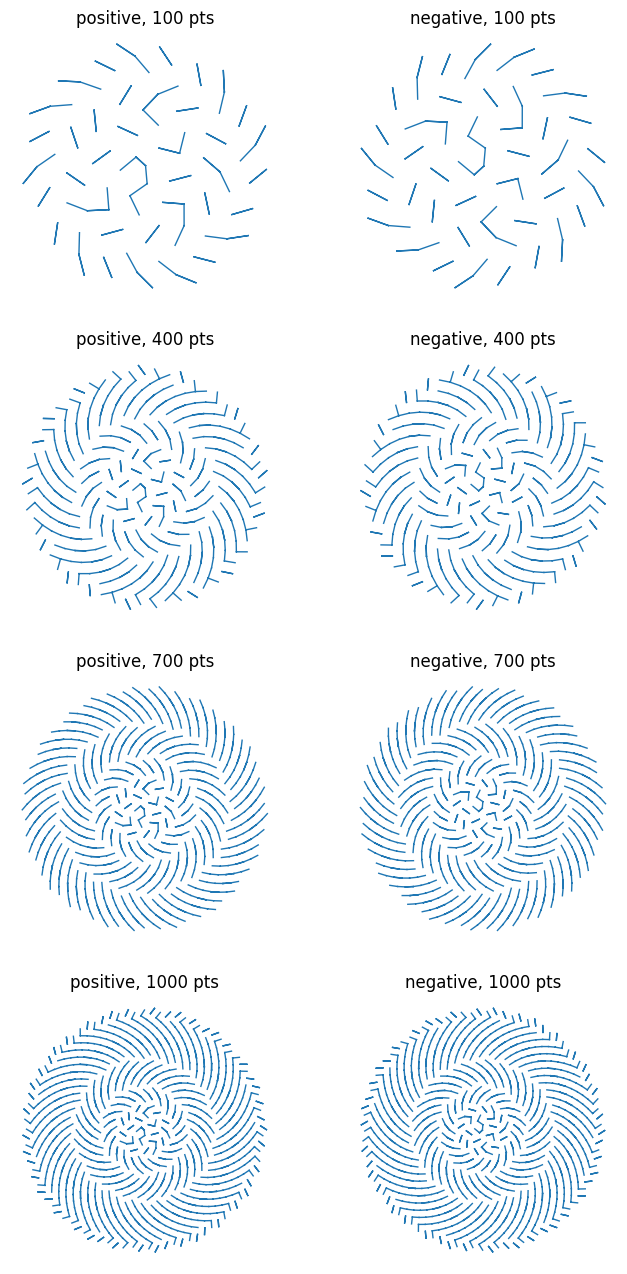

In [13]:
plt.figure(figsize=(8,16))

###
# 100 points
###

positive_100 = phyllotaxy_pts(100, direction="positive")
negative_100 = phyllotaxy_pts(100, direction="negative")

px_100, py_100 = nearest_neighbors(positive_100)
nx_100, ny_100 = nearest_neighbors(negative_100)

plt.subplot(4,2,1)
#plt.scatter(positive_100[:,0], positive_100[:,1], s=10)
plt.plot(px_100, py_100, lw=1)
plt.title("positive, 100 pts")
plt.gca().set_aspect("equal")
plt.axis("off")

plt.subplot(4,2,2)
#plt.scatter(negative_100[:,0], negative_100[:,1], s=10)
plt.plot(nx_100, ny_100, lw=1)
plt.title("negative, 100 pts")
plt.gca().set_aspect("equal")
plt.axis("off")

###
# 400 points
###

positive_400 = phyllotaxy_pts(400, direction="positive")
negative_400 = phyllotaxy_pts(400, direction="negative")

px_400, py_400 = nearest_neighbors(positive_400)
nx_400, ny_400 = nearest_neighbors(negative_400)

plt.subplot(4,2,3)
#plt.scatter(positive_400[:,0], positive_400[:,1], s=10)
plt.plot(px_400, py_400, lw=1)
plt.title("positive, 400 pts")
plt.gca().set_aspect("equal")
plt.axis("off")

plt.subplot(4,2,4)
#plt.scatter(negative_400[:,0], negative_400[:,1], s=10)
plt.plot(nx_400, ny_400, lw=1)
plt.title("negative, 400 pts")
plt.gca().set_aspect("equal")
plt.axis("off")

###
# 700 points
###

positive_700 = phyllotaxy_pts(700, direction="positive")
negative_700 = phyllotaxy_pts(700, direction="negative")

px_700, py_700 = nearest_neighbors(positive_700)
nx_700, ny_700 = nearest_neighbors(negative_700)

plt.subplot(4,2,5)
#plt.scatter(positive_700[:,0], positive_700[:,1], s=10)
plt.plot(px_700, py_700, lw=1)
plt.title("positive, 700 pts")
plt.gca().set_aspect("equal")
plt.axis("off")

plt.subplot(4,2,6)
#plt.scatter(negative_700[:,0], negative_700[:,1], s=10)
plt.plot(nx_700, ny_700, lw=1)
plt.title("negative, 700 pts")
plt.gca().set_aspect("equal")
plt.axis("off")

###
# 1000 points
###

positive_1000 = phyllotaxy_pts(1000, direction="positive")
negative_1000 = phyllotaxy_pts(1000, direction="negative")

px_1000, py_1000 = nearest_neighbors(positive_1000)
nx_1000, ny_1000 = nearest_neighbors(negative_1000)

plt.subplot(4,2,7)
#plt.scatter(positive_1000[:,0], positive_1000[:,1], s=10)
plt.plot(px_1000, py_1000, lw=1)
plt.title("positive, 1000 pts")
plt.gca().set_aspect("equal")
plt.axis("off")

plt.subplot(4,2,8)
#plt.scatter(negative_1000[:,0], negative_1000[:,1], s=10)
plt.plot(nx_1000, ny_1000, lw=1)
plt.title("negative, 1000 pts")
plt.gca().set_aspect("equal")
plt.axis("off")



## Examples: finding nearest neighbors on Mammilaria photos

In [19]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

def generate_voronoi_diagram(points: np.ndarray):
    """
    Calculates and plots the 2D Voronoi diagram for a set of points.

    Args:
        points (np.ndarray): A 2D NumPy array where each row is a coordinate (x, y).
        title (str): The title for the plot.
    """
    if points.shape[0] < 4:
        print("Need at least 4 unique points to robustly compute a Voronoi diagram.")
        return

    # 1. Compute the Voronoi diagram
    # The Voronoi object contains all geometric data (vertices, ridges, etc.)
    vor = Voronoi(points)

    # 2. Plot the result using a dedicated helper function
    plt.figure(figsize=(20, 20))
    
    # voronoi_plot_2d is a simple way to visualize the diagram
    voronoi_plot_2d(vor, 
                    show_vertices=False, # Don't show the Voronoi vertices
                    line_colors='dodgerblue',
                    line_width=1.5,
                    line_alpha=0.6,
                    point_size=1)

    #plt.xlabel("X Coordinate")
    #plt.ylabel("Y Coordinate")
    plt.gca().set_aspect('equal', adjustable='box') # Ensure the scale is correct
    plt.show()

(-0.5, 2058.5, 1669.5, -0.5)

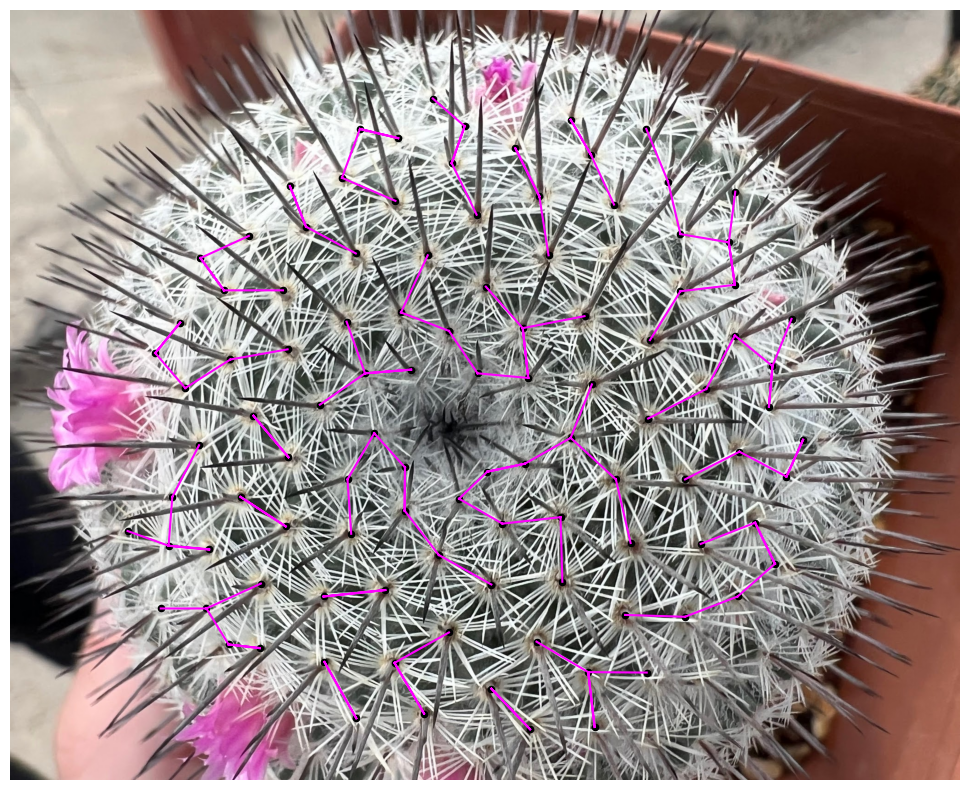

In [20]:
IMAGE_FILE = 'top_view.jpg'
COORDINATES_FILE = 'top_view.txt'

img = plt.imread(IMAGE_FILE)
points = np.loadtxt(COORDINATES_FILE)
x_nn, y_nn = nearest_neighbors(points)

plt.figure(figsize=(20,10))
plt.imshow(img, origin='upper')
plt.scatter(points[:,0], points[:,1], c="k", s=20)
plt.plot(x_nn, y_nn, c="magenta")
plt.axis("off")

<Figure size 2000x2000 with 0 Axes>

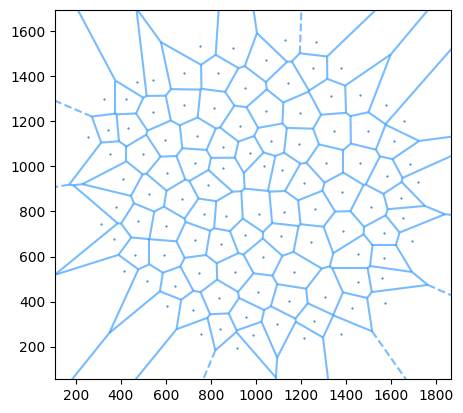

In [21]:
generate_voronoi_diagram(points)

(-0.5, 1128.5, 1669.5, -0.5)

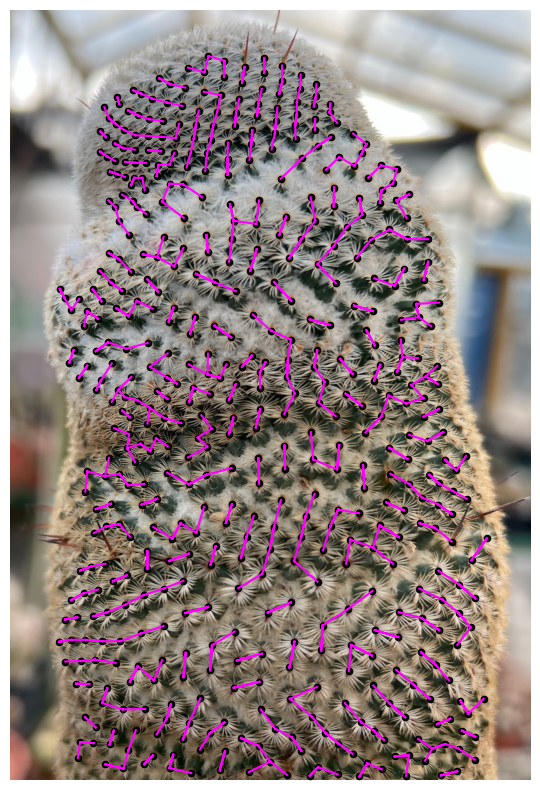

In [22]:
IMAGE_FILE = 'mammillaria_1.jpg'
COORDINATES_FILE = 'mammillaria_1.txt'

img = plt.imread(IMAGE_FILE)
points = np.loadtxt(COORDINATES_FILE)
x_nn, y_nn = nearest_neighbors(points)

plt.figure(figsize=(20,10))
plt.imshow(img, origin='upper')
plt.scatter(points[:,0], points[:,1], c="k", s=20)
plt.plot(x_nn, y_nn, c="magenta")
plt.axis("off")

<Figure size 2000x2000 with 0 Axes>

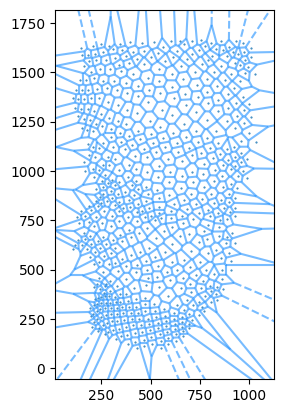

In [23]:
generate_voronoi_diagram(points)

(-0.5, 1519.5, 1669.5, -0.5)

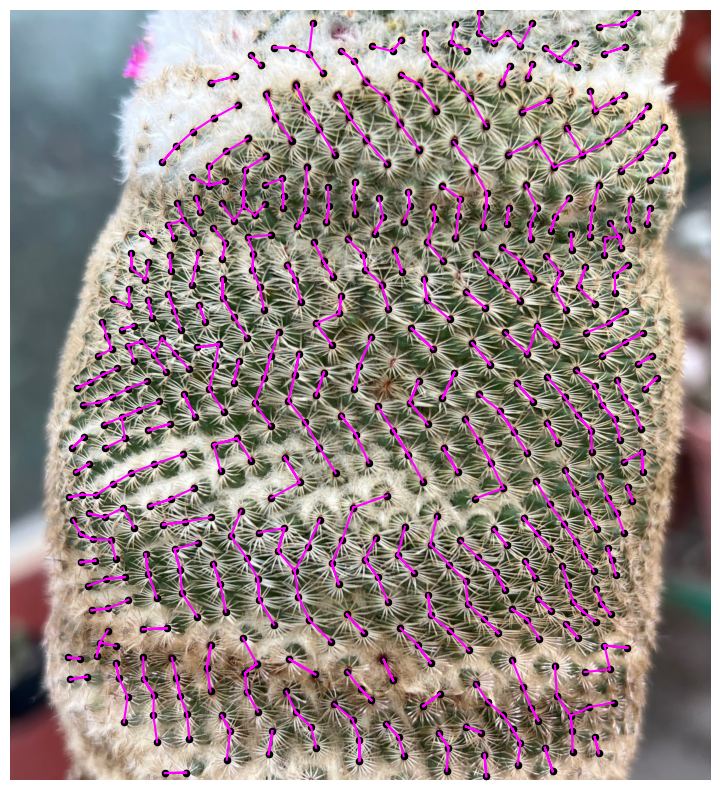

In [24]:
IMAGE_FILE = 'mammillaria_2.jpg'
COORDINATES_FILE = 'mammillaria_2.txt'

img = plt.imread(IMAGE_FILE)
points = np.loadtxt(COORDINATES_FILE)
x_nn, y_nn = nearest_neighbors(points)

plt.figure(figsize=(20,10))
plt.imshow(img, origin='upper')
plt.scatter(points[:,0], points[:,1], c="k", s=20)
plt.plot(x_nn, y_nn, c="magenta")
plt.axis("off")

<Figure size 2000x2000 with 0 Axes>

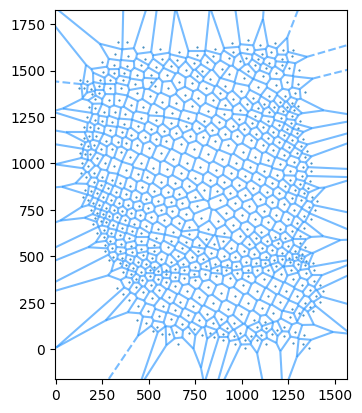

In [25]:
generate_voronoi_diagram(points)

(-0.5, 1836.5, 1669.5, -0.5)

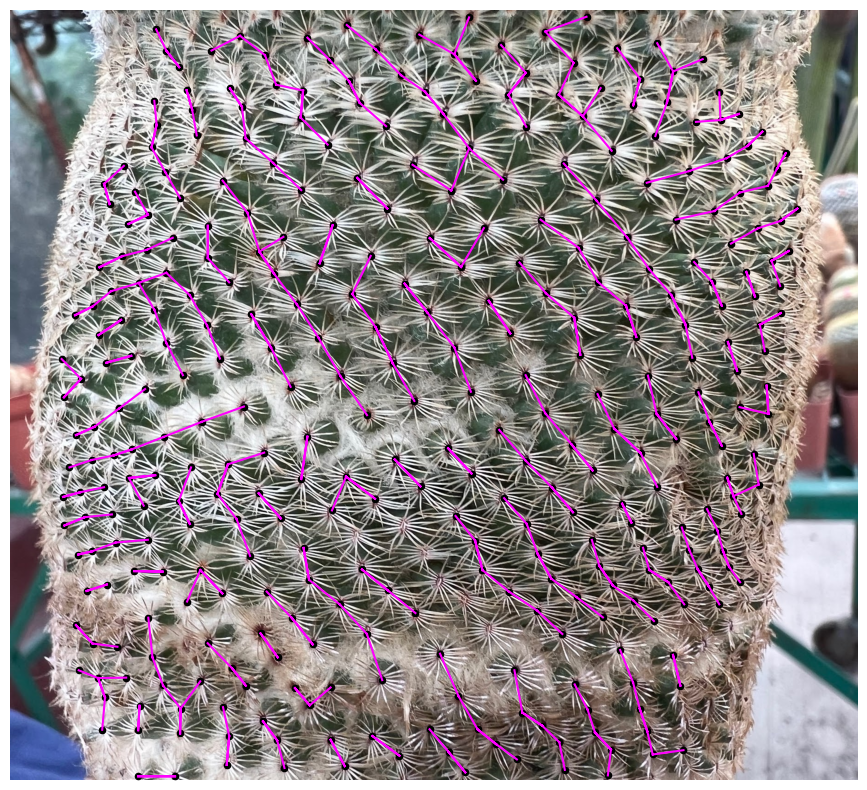

In [26]:
IMAGE_FILE = 'mammillaria_3.jpg'
COORDINATES_FILE = 'mammillaria_3.txt'

img = plt.imread(IMAGE_FILE)
points = np.loadtxt(COORDINATES_FILE)
x_nn, y_nn = nearest_neighbors(points)

plt.figure(figsize=(20,10))
plt.imshow(img, origin='upper')
plt.scatter(points[:,0], points[:,1], c="k", s=20)
plt.plot(x_nn, y_nn, c="magenta")
plt.axis("off")

<Figure size 2000x2000 with 0 Axes>

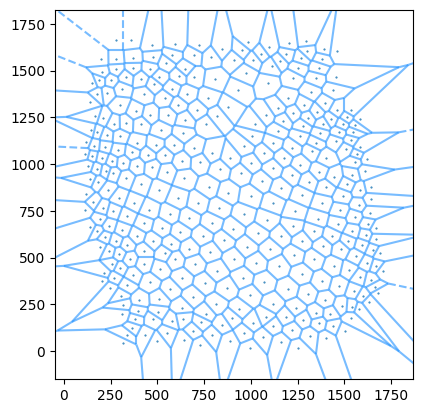

In [27]:
generate_voronoi_diagram(points)